# Assignment 1

##### Dilnovoz Abdurazzakova

In [1]:
# Importing relevant libraries to use
import warnings
import numpy  as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse,rmse
from plotnine import *
from skimpy import skim
import statsmodels
from stargazer.stargazer import Stargazer
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Opening the dataset to use
Income_data=pd.read_csv("morg-2014-emp.csv")

In [3]:
Income_data.shape

(149316, 23)

### Choosing the Occupation 

For the purpose of this assignment I choose Econonomists and 4 types of finance-specialized occupations: Accountants and auditors, Appraisers and assessors of real estate, Budget analysts, Credit analysts and Financial analysts.

In [4]:
Income_data.loc[Income_data["occ2012"] == 1800, "sample"] = 1

Income_data.loc[
    ((Income_data["occ2012"] >= 800)& (Income_data["occ2012"] <= 840)), "sample"] = 1
Income_data.loc[Income_data["sample"].isna(), "sample"] = 0
Income_data = Income_data.loc[
    (Income_data["sample"] == 1), :
].reset_index(drop=True)

In [5]:
Income_data.shape

(2329, 24)

## Task 1 
Models: the target variable is earnings per hour, all others would be predictors.

In [6]:
Income_data.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94', 'sample'],
      dtype='object')

In [7]:
### Creating target variable - Log_wage per hour
Income_data["w"] = Income_data["earnwke"] / Income_data["uhours"]
Income_data["lnw"] = np.log(Income_data["w"])

### Feature engineering

In [8]:
# Marital status
Income_data["Married"] = (Income_data["marital"].isin([1, 2, 3])).astype(int)

In [9]:
# Categorize Education
Income_data["ed_BA"] = (Income_data["grade92"] == 43).astype(int)
Income_data["ed_Advanced"] = (Income_data["grade92"] > 43).astype(int)

In [10]:
# Categorize race
Income_data["race"] = np.where(
    Income_data["race"] == 1,
    "white",
        np.where(Income_data["race"] == 2, "black", "other"),
)

In [11]:
# Gender
Income_data["female"] = (Income_data.sex == 2).astype(int)

In [12]:
# Age 
Income_data["agesq"] = np.power(Income_data["age"], 2)
Income_data["agec"] = np.power(Income_data["age"], 3)

In [13]:
# Native and Private dummy
Income_data["Native"] =  np.where(Income_data["prcitshp"] == "Native, Born In US", 1, 0)
Income_data["Private_profit"] =  np.where(Income_data["class"] == "Private, For Profit", 1, 0)

In [14]:
Income_data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,w,lnw,Married,ed_BA,ed_Advanced,female,agesq,agec,Native,Private_profit
0,44,954001919079770,January,AL,3677.7816,680.00,40,43,white,NaN,...,17.00000,2.833213,0,1,0,0,729,19683,1,1
1,125,507001320102921,January,AL,3296.7986,2000.00,50,44,white,NaN,...,40.00000,3.688879,1,0,1,0,2304,110592,1,1
2,187,210033043908195,January,AL,4563.6243,280.00,32,42,white,NaN,...,8.75000,2.169054,0,0,0,0,576,13824,1,1
3,353,700206992564793,January,AK,369.9124,1346.15,40,43,white,NaN,...,33.65375,3.516124,0,1,0,1,3600,216000,1,0
4,430,75933206026296,January,AK,531.2968,680.00,40,43,white,NaN,...,17.00000,2.833213,1,1,0,0,900,27000,0,1


## Task 2 
Shall be the simplest, model 4 the more complex. It shall be OLS. You shall explain your choice of predictors.

<AxesSubplot:>

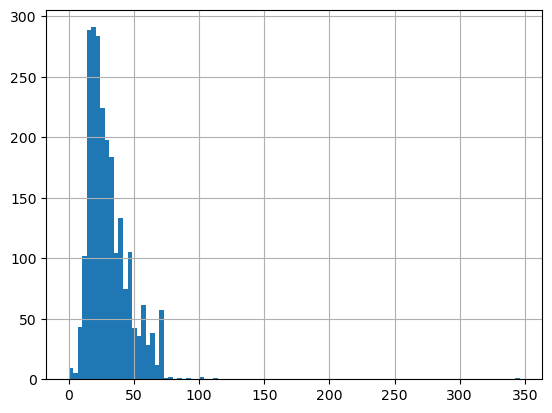

In [15]:
Income_data.w.hist(bins=100)

<AxesSubplot:>

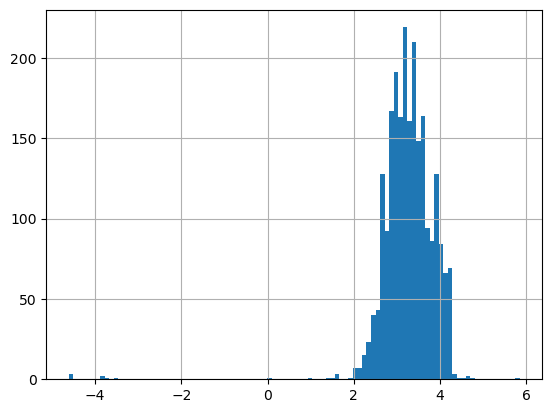

In [16]:
Income_data.lnw.hist(bins=100)

In [17]:
# use robust std
reg1 = smf.ols(formula="lnw~female+age+Native+C(race)+ownchild+Married", data=Income_data).fit(cov_type="HC1")
reg2 = smf.ols(formula="lnw~female+age+Native+C(race)+ownchild+Married+agesq+agec+Married*female", data=Income_data).fit(cov_type="HC1")
reg3 = smf.ols(formula="lnw~ed_BA+ed_Advanced+Private_profit", data=Income_data).fit(cov_type="HC1")
reg4 = smf.ols(formula="lnw~female+age+Native+C(race)+ownchild+Married+agesq+agec+Married*female+ed_BA+ed_Advanced+Private_profit+ed_Advanced*female+ed_BA*female", data=Income_data).fit(cov_type="HC1")
reg5 = smf.ols(formula="w~female+age+Native+C(race)+ownchild+Married", data=Income_data).fit(cov_type="HC1")
reg6 = smf.ols(formula="w~female+age+Native+C(race)+ownchild+Married+agesq+agec+Married*female", data=Income_data).fit(cov_type="HC1")
reg7 = smf.ols(formula="w~ed_BA+ed_Advanced+Private_profit", data=Income_data).fit(cov_type="HC1")
reg8 = smf.ols(formula="w~female+age+Native+C(race)+ownchild+Married+agesq+agec+Married*female+ed_BA+ed_Advanced+Private_profit+ed_Advanced*female+ed_BA*female", data=Income_data).fit(cov_type="HC1")


In [18]:
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8])
stargazer.custom_columns(["ln wage", "ln wage", "ln wage", "ln wage", "wage", "wage", "wage", "wage"], [1, 1, 1, 1, 1, 1, 1, 1])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

## Task 3
Compare model performance of these models (a) RMSE in the full sample, (2) cross-validated RMSE and (c) BIC in the full sample. 

In [19]:
reg_fits = [reg5, reg6, reg7, reg8]

In [20]:
reg_bics = [reg_fit.bic for reg_fit in reg_fits]
reg_rmses = [
    rmse(reg_fit.predict(Income_data), Income_data["w"]) for reg_fit in reg_fits
]

In [21]:
reg_rmses

[15.817484282366081,
 15.716813851443074,
 15.767024757852855,
 15.031901414695243]

In [22]:
results = pd.concat(
    [
        pd.DataFrame(
            data=[reg_rmses, reg_bics],
            columns=["Model" + str(i + 1) for i in range(len(reg_fits))],
        ).rename({0: "RMSE on full sample", 1: "BIC on full sample"}, axis=0)
    ]
).round(2)
results

,Model1,Model2,Model3,Model4
RMSE on full sample,15.82,15.72,15.77,15.03
BIC on full sample,19532.72,19526.24,19486.82,19357.46


In [23]:
formula1="w~female+age+Native+C(race)+ownchild+Married"
formula2="w~female+age+Native+C(race)+ownchild+Married+agesq+agec+Married*female"
formula3="w~ed_BA+ed_Advanced+Private_profit"
formula4="w~female+age+Native+C(race)+ownchild+Married+agesq+agec+Married*female+ed_BA+ed_Advanced+Private_profit+ed_Advanced*female+ed_BA*female"
model_equations = [formula1, formula2, formula3, formula4]

In [24]:
def ols_crossvalidator(
    formula: str, data: pd.DataFrame, n_folds=5, average_rmse=True
) -> dict:
    y = formula.split("~")[0].strip()

    # Get statistics on the whole work data

    model = smf.ols(formula, data=data).fit()

    rsquared = model.rsquared
    # n_coefficients = model.params.shape[0]
    n_coefficients = (
        model.df_model + 1
    )  # This might differ from model.params.shape[0], because of collinear predictors
    bic = model.bic
    rmse_alldata = rmse(model.predict(), data[y])

    # Calculating test and train RMSE-s for each fold

    k = KFold(n_splits=n_folds, shuffle=False, random_state=None)

    rmse_train = []
    rmse_test = []

    for train_index, test_index in k.split(data):

        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]

        model = smf.ols(formula, data=data_train).fit()

        rmse_train.append(rmse(data_train[y], model.predict(data_train)))
        rmse_test.append(rmse(data_test[y], model.predict(data_test)))

    if average_rmse:
        rmse_train = np.mean(rmse_train)
        rmse_test = np.mean(rmse_test)

    return {
        "RMSE": rmse_alldata,
        "R-squared": rsquared,
        "BIC": bic,
        "Coefficients": n_coefficients,
        "Training RMSE": rmse_train,
        "Test RMSE": rmse_test,
    }

In [25]:
cv_list = []
for equation in model_equations:
    cv_list.append(ols_crossvalidator(equation, Income_data, 5, average_rmse=False))

In [26]:
rmse_test_folds = pd.DataFrame(
    [cv["Test RMSE"] for cv in cv_list],
    index=["Model" + str(i + 1) for i in range(len(cv_list))],
    columns=["Fold" + str(i + 1) for i in range(len(cv_list[0]["Test RMSE"]))],
).assign(Average=lambda x: x.mean(axis=1)).T.round(2)
total = rmse_test_folds.append(results)
total

,Model1,Model2,Model3,Model4
Fold1,13.50,13.31,13.13,12.56
Fold2,14.08,13.90,14.12,13.42
Fold3,20.84,20.87,20.53,20.01
Fold4,14.15,13.98,14.59,13.60
Fold5,15.68,15.68,15.54,15.09
Average,15.65,15.55,15.58,14.93
RMSE on full sample,15.82,15.72,15.77,15.03
BIC on full sample,19532.72,19526.24,19486.82,19357.46


## Task 4
Discuss the relationship between model complexity and performance. You may use visual aids

In [27]:
regression_fits = []
for equation in model_equations:
    regression_fits.append(smf.ols(equation, Income_data).fit(cov_type="HC1"))

In [28]:
def extract_regression_statistics(
    reg: statsmodels.regression.linear_model.RegressionResultsWrapper,
) -> dict:
    """
    Quick function to extract statistics (eg. AIC, BIC, RMSE) for statsmodels' fitted regressions.
    """

    return {
        "AIC": reg.aic,
        "BIC": reg.bic,
        "RMSE": np.sqrt(reg.mse_resid),
        "No. Variables": reg.df_model,
    }

In [29]:
regression_statistics = pd.DataFrame(
    [extract_regression_statistics(reg) for reg in regression_fits]
).round(2)

In [30]:
complexity_plotdata = (
    regression_statistics.filter(["No. Variables", "RMSE"])
    .merge(
        rmse_test_folds.T.filter(["Average"]).reset_index(drop=True),
        left_index=True,
        right_index=True,
    )
    .rename(columns={"RMSE": "in-sample RMSE", "Average": "out-of-sample RMSE"})
    .melt(id_vars=["No. Variables"])
)

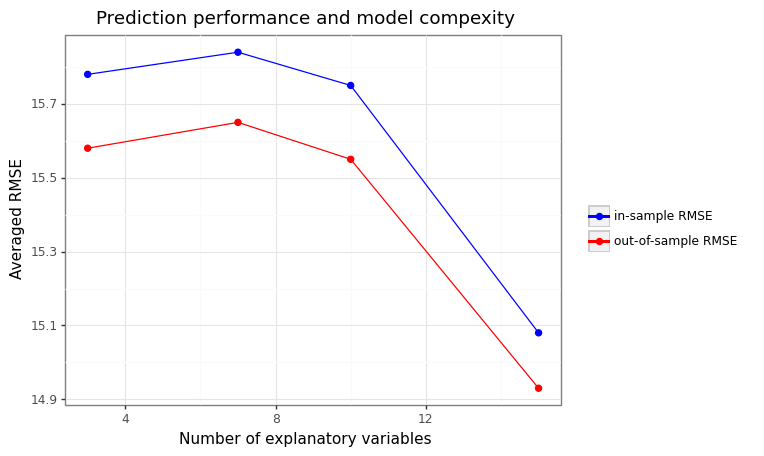

<ggplot: (172616929250)>

In [34]:
(
   ggplot(
        complexity_plotdata,
        aes(x="No. Variables", y="value", color="variable", fill="variable"),
    )
    + geom_point(size=2)
    + geom_line(size=0.5)
    + scale_y_continuous()
    + scale_color_manual(name=" ", values=("blue", "red"))
    + scale_fill_manual(name=" ", values=("blue", "red"))
    + labs(
        x="Number of explanatory variables",
        y="Averaged RMSE",
        title="Prediction performance and model compexity",
    )
    + theme_bw()
)